In [1]:
%%HTML
<h1>Import Data</h1>

In [2]:
import pandas as pd
df1 = pd.read_csv('./data/210730_HNX_ALL.txt', sep = ',')
df2 = pd.read_csv('./data/210730_HOSE_ALL.txt', sep = ',')

frames = [df1, df2]
df = pd.concat(frames, ignore_index = True)
df.head()

,<Ticker>,<DTYYYYMMDD>,<Open>,<High>,<Low>,<Close>,<Volume>
0,AAV,20210730,12.4,12.4,12.1,12.4,166400
1,ABT,20210730,26.0,27.2,26.0,27.1,1207
2,ACM,20210730,2.3,2.4,2.3,2.4,592463
3,ADC,20210730,21.5,21.5,21.5,21.5,0
4,ALT,20210730,12.7,12.7,12.7,12.7,0


In [3]:
%%HTML
<h1>Extract Data</h1>

In [4]:
# Remove redundant characters
df.columns=df.columns.str.replace('[<,>]','', regex=True)
df.head()

# Drop duplicate records
df_modified = df.drop_duplicates(subset = ['Ticker', 'DTYYYYMMDD'], keep = 'first')

# Change date data type
df_modified["DTYYYYMMDD"] = pd.to_datetime(df_modified["DTYYYYMMDD"], format='%Y%m%d')
df_modified.head()

,Ticker,DTYYYYMMDD,Open,High,Low,Close,Volume
0,AAV,2021-07-30,12.4,12.4,12.1,12.4,166400
1,ABT,2021-07-30,26.0,27.2,26.0,27.1,1207
2,ACM,2021-07-30,2.3,2.4,2.3,2.4,592463
3,ADC,2021-07-30,21.5,21.5,21.5,21.5,0
4,ALT,2021-07-30,12.7,12.7,12.7,12.7,0


In [5]:
#Pivot the table
data = df_modified.pivot(index='DTYYYYMMDD', columns='Ticker', values = 'Close')
print(data)

Ticker         AAA     AAM   AAT   AAV    ABS     ABT     ACB     ACC     ACL  \
DTYYYYMMDD                                                                      
2012-01-03   2.950   8.336   NaN   NaN    NaN  13.371   5.760   5.259   5.411   
2012-01-04   2.976   8.487   NaN   NaN    NaN  13.409   5.760   5.289   5.349   
2012-01-05   2.950   8.374   NaN   NaN    NaN  13.669   5.939   5.053   5.349   
2012-01-06   2.925   8.374   NaN   NaN    NaN  13.036   5.819   5.289   5.349   
2012-01-09   2.950   8.374   NaN   NaN    NaN  13.036   5.790   5.289   5.349   
...            ...     ...   ...   ...    ...     ...     ...     ...     ...   
2021-07-26  15.450  10.800  17.5  12.4  18.55  27.600  32.700  14.000  11.400   
2021-07-27  16.000  10.500  17.7  12.4  18.90  27.600  33.150  13.700  11.600   
2021-07-28  16.300  10.100  17.6  12.4  19.35  27.000  33.150  13.700  11.600   
2021-07-29  16.150  10.800  17.6  12.4  19.95  27.000  34.150  13.700  11.500   
2021-07-30  16.150  10.900  

In [6]:
 0 in data.values

True

In [7]:
import numpy as np
data.replace(0, np.nan, inplace=True)

In [8]:
0 in data.values

False

In [9]:
data1= data.copy()

In [10]:
%%HTML
<h1>Filter Data</h1>

In [11]:
%%HTML
<h3>Here we only consider data between 01/01/2015 and 31/12/2018 (a total of 999 days)</h3>

In [12]:
import datetime
start_date = datetime.date(2015, 1, 1)
end_date = datetime.date(2018, 12, 31)
data = data.loc[start_date:end_date]
data.head()

Ticker,AAA,AAM,AAT,AAV,ABS,ABT,ACB,ACC,ACL,ACM,...,VTJ,VTL,VTO,VTV,VXB,WCS,WSS,X20,YBM,YEG
DTYYYYMMDD,,,,,,,,,,,,,,,,,,,,,
2015-01-05,6.223,7.485,NaN,NaN,NaN,31.261,4.991,14.233,4.147,NaN,...,NaN,11.92,4.526,6.860,11.637,82.363,5.2,NaN,NaN,NaN
2015-01-06,6.314,7.433,NaN,NaN,NaN,31.261,5.056,13.758,4.147,NaN,...,NaN,11.92,4.744,6.890,11.637,76.315,5.4,NaN,NaN,NaN
2015-01-07,6.539,7.485,NaN,NaN,NaN,30.968,5.121,13.370,4.328,NaN,...,NaN,11.92,4.799,6.978,11.637,73.488,5.3,NaN,NaN,NaN
2015-01-08,6.404,7.537,NaN,NaN,NaN,32.137,5.154,13.370,4.328,NaN,...,NaN,11.92,4.799,7.508,11.637,73.488,5.3,NaN,NaN,NaN
2015-01-09,6.269,7.069,NaN,NaN,NaN,33.890,5.187,14.060,4.292,NaN,...,NaN,11.92,4.908,7.508,11.637,73.431,5.4,NaN,NaN,NaN


In [13]:
%%HTML
<h1>Clean Data</h1>

In [14]:
pd.set_option('display.precision', 3)

In [15]:
#Check for missing values
data.isnull().values.any()

True

<AxesSubplot:>

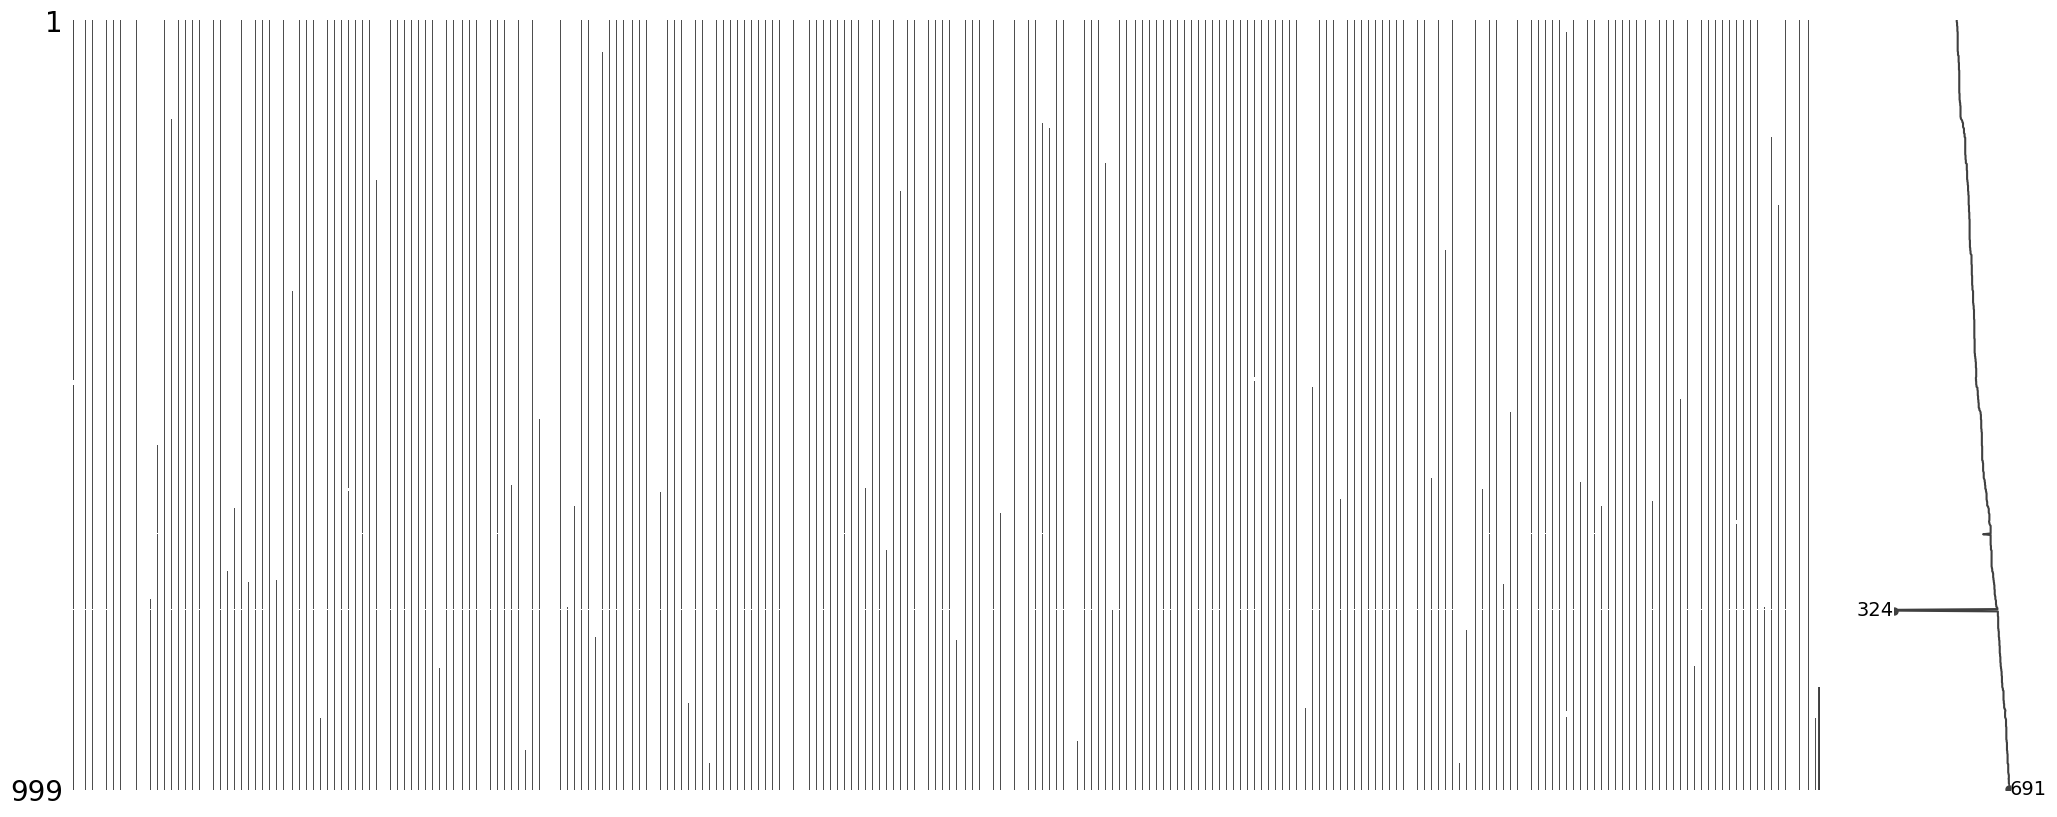

In [16]:
#Plot the missing value matrix
import missingno
missingno.matrix(data)

In [17]:
%%HTML
<h3>We shall remove all the columns with more than 20% of missing data</h3>

In [18]:
print('Data Shape before cleaning =', data.shape)

missing_percentage = data.isnull().mean().sort_values(ascending=False)
dropped_list = sorted(list(missing_percentage[missing_percentage > 0.2].index))
data.drop(labels=dropped_list, axis=1, inplace=True)

print('Data Shape after cleaning =', data.shape)

Data Shape before cleaning = (999, 750)
Data Shape after cleaning = (999, 556)


In [19]:
#Fill the remaining missing values with already available values
data = data.fillna(method='ffill')
data = data.fillna(method='bfill')
pricing = data.copy()
data.head()

Ticker,AAA,AAM,ABT,ACB,ACC,ACL,ACM,ADC,AGM,AGR,...,VSH,VSI,VTB,VTH,VTL,VTO,VTV,VXB,WCS,WSS
DTYYYYMMDD,,,,,,,,,,,,,,,,,,,,,
2015-01-05,6.223,7.485,31.261,4.991,14.233,4.147,10.022,7.491,7.538,6.2,...,9.075,6.284,6.694,11.108,11.92,4.526,6.860,11.637,82.363,5.2
2015-01-06,6.314,7.433,31.261,5.056,13.758,4.147,10.022,7.325,7.538,6.2,...,9.142,5.895,6.527,11.326,11.92,4.744,6.890,11.637,76.315,5.4
2015-01-07,6.539,7.485,30.968,5.121,13.370,4.328,10.022,7.325,7.538,6.3,...,9.142,6.229,6.471,11.326,11.92,4.799,6.978,11.637,73.488,5.3
2015-01-08,6.404,7.537,32.137,5.154,13.370,4.328,10.022,7.325,7.210,6.3,...,9.009,5.839,6.917,11.326,11.92,4.799,7.508,11.637,73.488,5.3
2015-01-09,6.269,7.069,33.890,5.187,14.060,4.292,10.022,7.558,7.472,6.4,...,9.075,5.839,7.141,11.544,11.92,4.908,7.508,11.637,73.431,5.4


In [20]:
import numpy as np

#Calculate returns and create a data frame
returns = data.pct_change()

returns.replace([np.inf, -np.inf], np.nan, inplace=True)
returns.dropna(inplace=True)

print(returns)


Ticker        AAA    AAM    ABT    ACB    ACC    ACL    ACM    ADC    AGM  \
DTYYYYMMDD                                                                  
2015-01-06  0.015 -0.007  0.000  0.013 -0.033  0.000  0.000 -0.022  0.000   
2015-01-07  0.036  0.007 -0.009  0.013 -0.028  0.044  0.000  0.000  0.000   
2015-01-08 -0.021  0.007  0.038  0.006  0.000  0.000  0.000  0.000 -0.044   
2015-01-09 -0.021 -0.062  0.055  0.006  0.052 -0.008  0.000  0.032  0.036   
2015-01-12 -0.029  0.059 -0.034  0.013  0.000 -0.008  0.000  0.000  0.018   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2018-12-24 -0.023  0.004  0.000 -0.014  0.000 -0.052  0.000  0.097  0.036   
2018-12-25 -0.020  0.011 -0.052 -0.007  0.000 -0.063  0.000  0.000 -0.018   
2018-12-26  0.000  0.008 -0.029 -0.003  0.000  0.005  0.143  0.000 -0.027   
2018-12-27  0.028 -0.015  0.070  0.024  0.000  0.035 -0.125  0.000  0.000   
2018-12-28 -0.013  0.015 -0.050  0.007  0.000  0.000  0.000  0.000  0.000   

In [21]:
returns = returns.reset_index()
returns = returns.drop(['DTYYYYMMDD'], axis=1)
returns.head()

Ticker,AAA,AAM,ABT,ACB,ACC,ACL,ACM,ADC,AGM,AGR,...,VSH,VSI,VTB,VTH,VTL,VTO,VTV,VXB,WCS,WSS
0,0.015,-0.007,0.000,0.013,-0.033,0.000,0.0,-0.022,0.000,0.000,...,0.007,-0.062,-0.025,0.020,0.0,0.048,0.004,0.0,-7.343e-02,0.038
1,0.036,0.007,-0.009,0.013,-0.028,0.044,0.0,0.000,0.000,0.016,...,0.000,0.057,-0.009,0.000,0.0,0.012,0.013,0.0,-3.704e-02,-0.019
2,-0.021,0.007,0.038,0.006,0.000,0.000,0.0,0.000,-0.044,0.000,...,-0.015,-0.063,0.069,0.000,0.0,0.000,0.076,0.0,0.000e+00,0.000
3,-0.021,-0.062,0.055,0.006,0.052,-0.008,0.0,0.032,0.036,0.016,...,0.007,0.000,0.032,0.019,0.0,0.023,0.000,0.0,-7.756e-04,0.019
4,-0.029,0.059,-0.034,0.013,0.000,-0.008,0.0,0.000,0.018,-0.016,...,-0.007,-0.067,0.000,-0.050,0.0,-0.033,0.000,0.0,-1.463e-02,-0.037


In [22]:
%%HTML
<h1>Customized Features</h1>

In [23]:
%%HTML
<h3>We will be adding some fundamental values as well to make the model more robust</h3>

In [24]:
import numpy as np

#Calculate returns and create a data frame
mean_returns = data.pct_change().mean()*998 
mean_returns = pd.DataFrame(mean_returns)
mean_returns.columns = ['mean returns']

#Calculate the volatility
mean_returns['volatility'] = data.pct_change().std()*np.sqrt(998)
mean_returns.head()

,mean returns,volatility
Ticker,,
AAA,1.011,0.748
AAM,0.608,0.898
ABT,0.340,0.710
ACB,1.212,0.601
ACC,0.191,0.727


In [25]:
#Adding the industry
industry = pd.read_excel('./data/industry.xlsx', index_col=0)
industry_filter = industry
for i in industry.index:
    if i not in mean_returns.index:
        industry_filter = industry_filter.drop(i)

industry1 = pd.get_dummies(industry_filter, columns = ['Value'])
industry1.head()

,Value_Bán lẻ,Value_Bất động sản,Value_Cao Su,Value_Chứng khoán,Value_Công nghệ viễn thông,Value_Dược phẩm,Value_Dược phẩm/Y tế/Hóa chất,Value_Dầu khí,Value_Dịch vụ - Du lịch,Value_Dịch vụ công ích,...,Value_Sản xuất - Kinh doanh,Value_Thép,Value_Thương mại,Value_Thủy sản,Value_Thực phẩm,Value_Vận tải - Cảng - Taxi,Value_Vật liệu xây dựng,Value_Xây dựng,Value_Đầu tư và phát triển,Value_Đầu tư và xây dựng
Ticker,,,,,,,,,,,,,,,,,,,,,
AAA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
ABT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
ACB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
# returns_trans = returns.transpose()
# Importing PCA
from sklearn.decomposition import PCA
  
# Let's say, components = 5
N_PRIN_COMPONENTS = 5
pca = PCA(n_components=N_PRIN_COMPONENTS)
pca.fit(returns)

PCA(n_components=5)

In [27]:
# X = np.hstack((returns_trans, returns1, industry1))
X = np.hstack((pca.components_.T, mean_returns, industry1))
print(X)

[[-1.73366777e-05  1.27128111e-05 -6.37387856e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-4.04500766e-07 -5.53483275e-07 -8.87395182e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.26038687e-07  3.49775825e-05 -8.19247365e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-3.43854171e-07 -4.77758735e-07 -4.79637848e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.07016907e-07 -2.90072418e-05 -3.63189096e-03 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 2.28993405e-05  3.00935285e-05 -5.54874230e-02 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [28]:
%%HTML
<h1>Scale the Data</h1>

In [29]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit_transform(X)
print(X.shape)

(556, 34)


In [30]:
%%HTML
<h1>DBSCAN Clustering</h1>

In [31]:
from sklearn.cluster import KMeans, DBSCAN
clf = DBSCAN(eps=1.9, min_samples=3)
print(clf)

clf.fit(X)
labels = clf.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print ("\nClusters discovered: %d" % n_clusters_)

clustered = clf.labels_

DBSCAN(eps=1.9, min_samples=3)

Clusters discovered: 26


In [32]:
from sklearn import metrics
print("dbscan", metrics.silhouette_score(X, clf.labels_, metric='euclidean'))

dbscan 0.7219964871622722


In [33]:
%%HTML
<h1>Cluster Visualization</h1>

In [34]:
# the initial dimensionality of the search was
ticker_count = len(returns.columns)
print("Total pairs possible in universe: %d " % (ticker_count*(ticker_count-1)/2))

Total pairs possible in universe: 154290 


In [35]:
clustered_series = pd.Series(index=returns.columns, data=clustered.flatten())
clustered_series_all = pd.Series(index=returns.columns, data=clustered.flatten())
clustered_series = clustered_series[clustered_series != -1]

In [36]:
from sklearn.manifold import TSNE
X_tsne = TSNE(init = "random", learning_rate=1000, perplexity=25, random_state=1337).fit_transform(X)

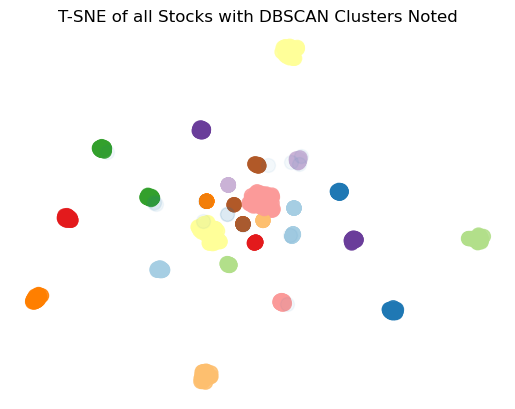

In [37]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.figure(1, facecolor='white')
plt.clf()
plt.axis('off')
plt.scatter(
    X_tsne[(labels!=-1), 0],
    X_tsne[(labels!=-1), 1],
    s=100,
    alpha=0.85,
    c=labels[labels!=-1],
    cmap=cm.Paired
)

plt.scatter(
    X_tsne[(clustered_series_all==-1).values, 0],
    X_tsne[(clustered_series_all==-1).values, 1],
    s=100,
    alpha=0.05
)

plt.title('T-SNE of all Stocks with DBSCAN Clusters Noted');

Text(0, 0.5, 'Cluster Number')

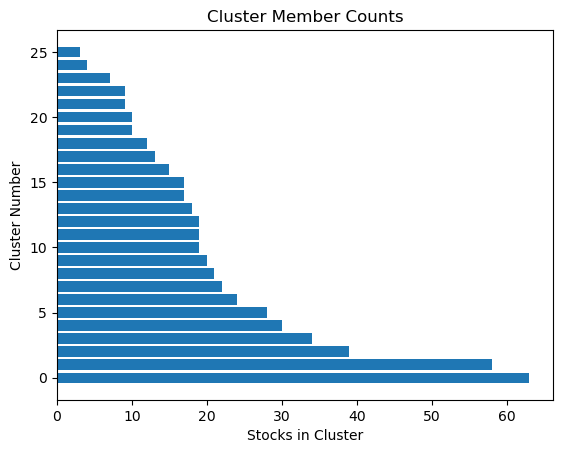

In [38]:
plt.barh(range(len(clustered_series.value_counts())), clustered_series.value_counts())
plt.title('Cluster Member Counts')
plt.xlabel('Stocks in Cluster')
plt.ylabel('Cluster Number')

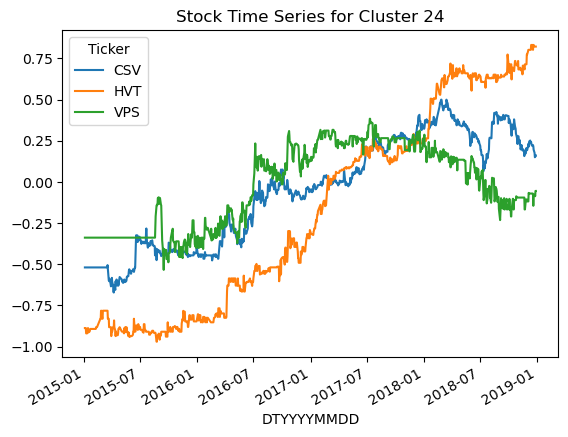

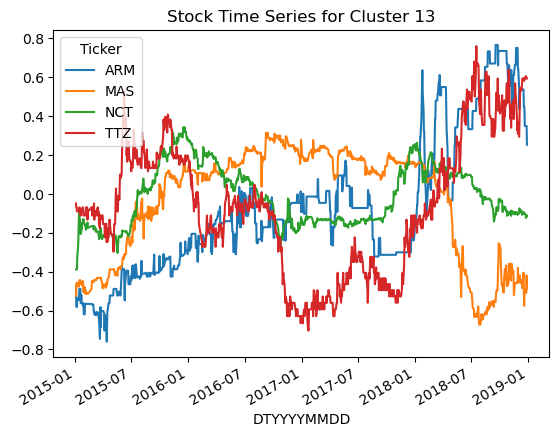

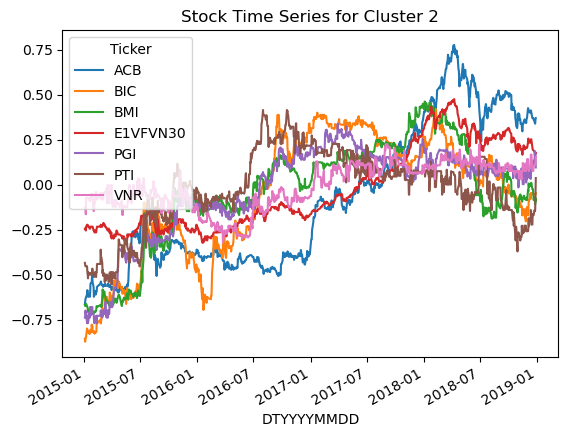

In [39]:
# get the number of stocks in each cluster
counts = clustered_series.value_counts()

# let's visualize some clusters
cluster_vis_list = list(counts[(counts<20) & (counts>1)].index)[::-1]

# plot a handful of the smallest clusters
for clust in cluster_vis_list[0:min(len(cluster_vis_list), 3)]:
    tickers = list(clustered_series[clustered_series==clust].index)
    means = np.log(pricing[tickers].mean())
    datas = np.log(pricing[tickers]).sub(means)
    datas.plot(title='Stock Time Series for Cluster %d' % clust)

In [40]:
%%HTML
<h1>Pair Selection</h1>

In [41]:
CLUSTER_SIZE_LIMIT = 9999
counts = clustered_series.value_counts()
ticker_count_reduced = counts[(counts>1) & (counts<=CLUSTER_SIZE_LIMIT)]
print ("Clusters formed: %d" % len(ticker_count_reduced))
print ("Pairs to evaluate: %d" % (ticker_count_reduced*(ticker_count_reduced-1)).sum())

Clusters formed: 26
Pairs to evaluate: 16014


In [42]:
%%HTML
<h3>Cointegration and pair selection function</h3>

In [43]:
from statsmodels.tsa.stattools import coint
def find_cointegrated_pairs(data, significance=0.05):
    # This function is from https://www.quantopian.com/lectures/introduction-to-pairs-trading
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(1):
        for j in range(i+1, n):
            S1 = data[keys[i]]            
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < significance:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [44]:
from statsmodels.tsa.stattools import coint

cluster_dict = {}
for i, which_clust in enumerate(ticker_count_reduced.index):
    tickers = clustered_series[clustered_series == which_clust].index
    score_matrix, pvalue_matrix, pairs = find_cointegrated_pairs(pricing[tickers])
    cluster_dict[which_clust] = {}
    cluster_dict[which_clust]['score_matrix'] = score_matrix
    cluster_dict[which_clust]['pvalue_matrix'] = pvalue_matrix
    cluster_dict[which_clust]['pairs'] = pairs

In [45]:
pairs = []
for clust in cluster_dict.keys():
    pairs.extend(cluster_dict[clust]['pairs'])

In [46]:
pairs

[('CAV', 'GDT'),
 ('CAV', 'ITQ'),
 ('CLL', 'HCT'),
 ('CLL', 'PHP'),
 ('CLL', 'PJC'),
 ('CLL', 'PRC'),
 ('CLL', 'PSC'),
 ('CLL', 'TCO'),
 ('AGM', 'APC'),
 ('AGM', 'BBC'),
 ('AGM', 'CAN'),
 ('AGM', 'CAP'),
 ('AGM', 'CLC'),
 ('AGM', 'FMC'),
 ('AGM', 'GTN'),
 ('AGM', 'HAD'),
 ('AGM', 'HAT'),
 ('AGM', 'HCM'),
 ('AGM', 'HHC'),
 ('AGM', 'HLC'),
 ('AGM', 'KTS'),
 ('AGM', 'LAF'),
 ('AGM', 'LSS'),
 ('AGM', 'MCF'),
 ('AGM', 'NAF'),
 ('AGM', 'NST'),
 ('AGM', 'SAF'),
 ('AGM', 'SCD'),
 ('AGM', 'SGC'),
 ('AGM', 'SLS'),
 ('AGM', 'SSI'),
 ('AGM', 'TAC'),
 ('AGM', 'THB'),
 ('AGM', 'VCF'),
 ('AGM', 'VDL'),
 ('AGM', 'VND'),
 ('AGM', 'VTL'),
 ('BID', 'MSN'),
 ('BID', 'NVB'),
 ('ALT', 'BDB'),
 ('ALT', 'BED'),
 ('ALT', 'DAD'),
 ('ALT', 'DAE'),
 ('ALT', 'EBS'),
 ('ALT', 'EID'),
 ('ALT', 'HBE'),
 ('ALT', 'HEV'),
 ('ALT', 'LBE'),
 ('ALT', 'QST'),
 ('ALT', 'SED'),
 ('ALT', 'SGD'),
 ('ALT', 'SMN'),
 ('ALT', 'STC'),
 ('ALT', 'TPH'),
 ('BTP', 'NBP'),
 ('AMC', 'BKC'),
 ('BTT', 'CCI'),
 ('BTT', 'CMS'),
 ('BTT', 'CMV'

In [47]:
%%HTML
<h1>TSNE Visualization of Pairs</h1>

In [48]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm

stocks = np.unique(pairs)
X_df = pd.DataFrame(index=returns.T.index, data=X)
in_pairs_series = clustered_series.loc[stocks]
stocks = list(np.unique(pairs))
X_pairs = X_df.loc[stocks]

X_tsne = TSNE(init = "random", learning_rate=50, perplexity=3, random_state=1337).fit_transform(X_pairs)

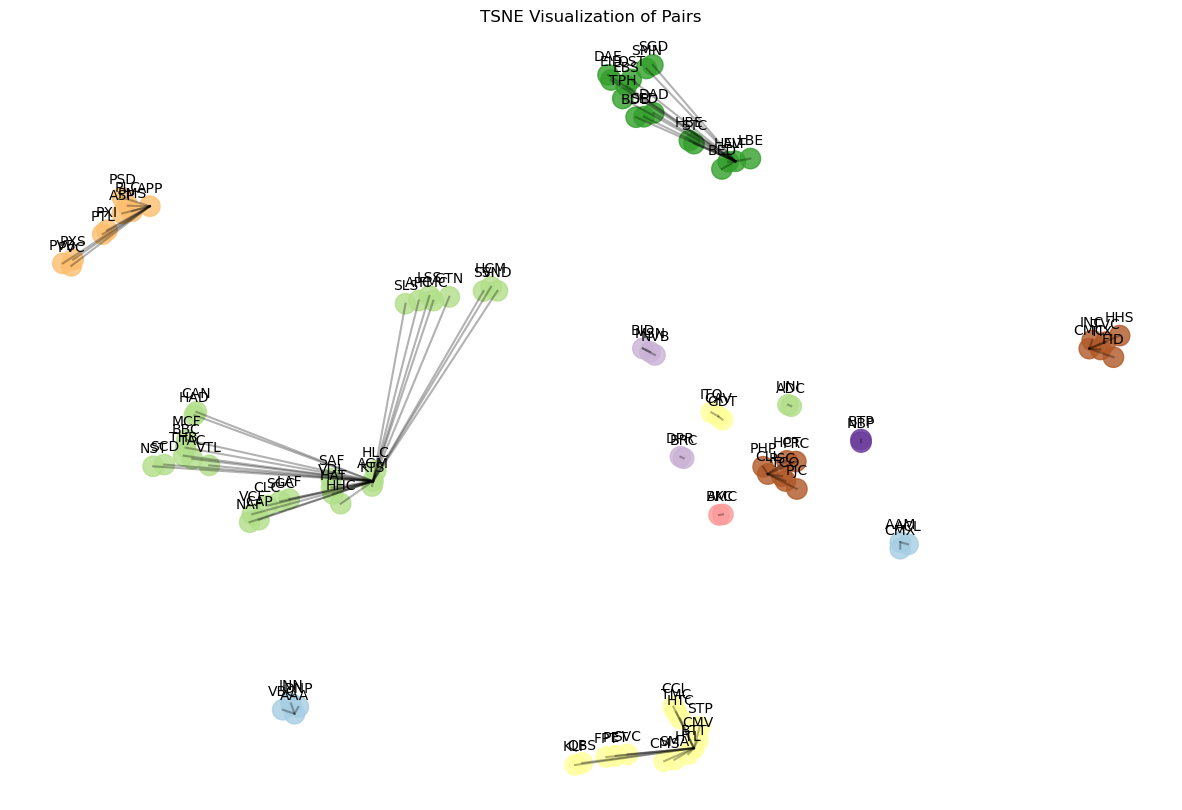

In [49]:
plt.figure(1, facecolor='white',figsize=(15,10))
plt.clf()
plt.axis('off')
for pair in pairs:
    ticker1 = pair[0]
    loc1 = X_pairs.index.get_loc(pair[0])
    x1, y1 = X_tsne[loc1, :]
    ticker2 = pair[1]
    loc2 = X_pairs.index.get_loc(pair[1])
    x2, y2 = X_tsne[loc2, :]
    plt.plot([x1, x2], [y1, y2], 'k-', alpha=0.3);
    
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=215, alpha=0.8, c=in_pairs_series.values, cmap=cm.Paired)
plt.title('TSNE Visualization of Pairs'); 

# Join pairs by x and y
for x,y,name in zip(X_tsne[:,0],X_tsne[:,1],X_pairs.index):

    label = name

    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')
    
plt.show()

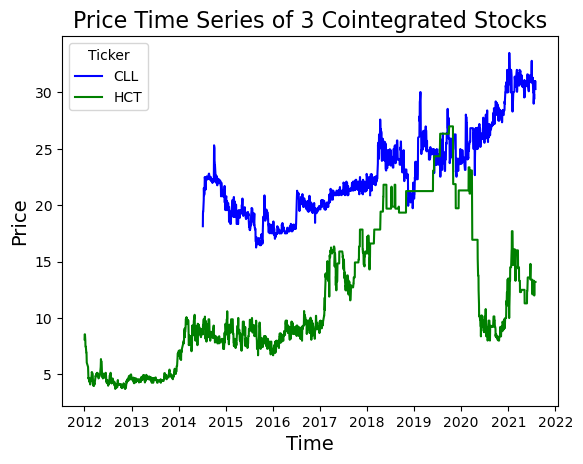

In [50]:
import matplotlib.pyplot as plt

plt.plot(data1['CLL'], label='CLL', color='blue')
plt.plot(data1['HCT'], label='HCT', color='green')
plt.legend(title='Ticker')

#add axes labels and a title
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('Price Time Series of 2 Cointegrated Stocks', fontsize=16)

#display plot
plt.show()